In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import streamlit as st
import pickle



In [3]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

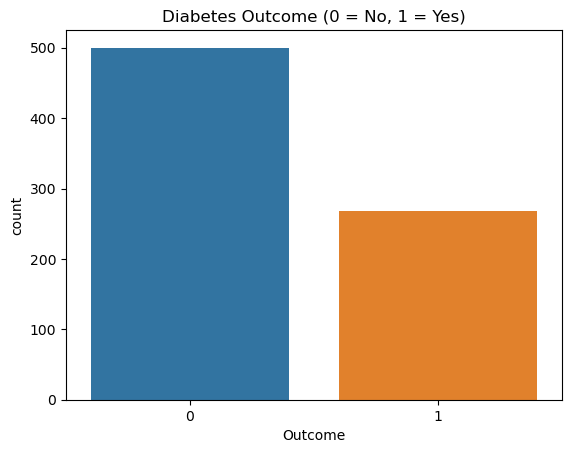

In [9]:
# Class distribution
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()

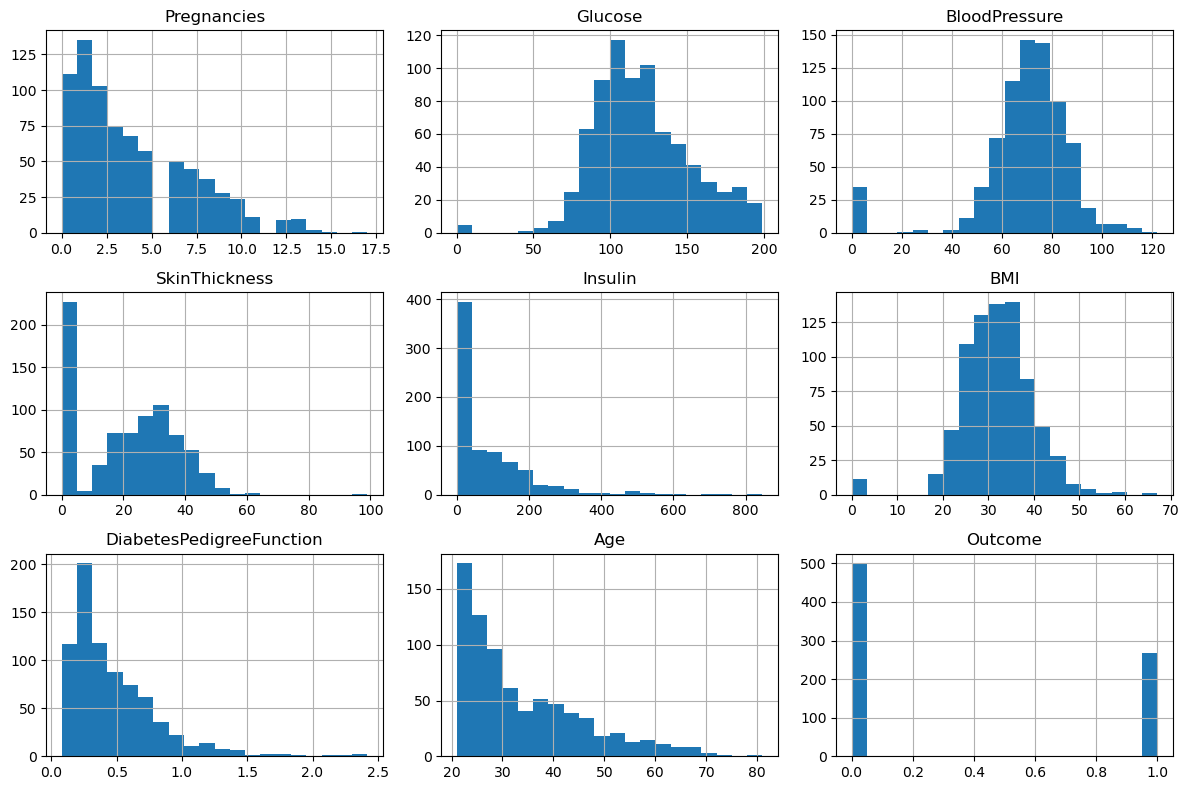

In [10]:
# Histograms
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

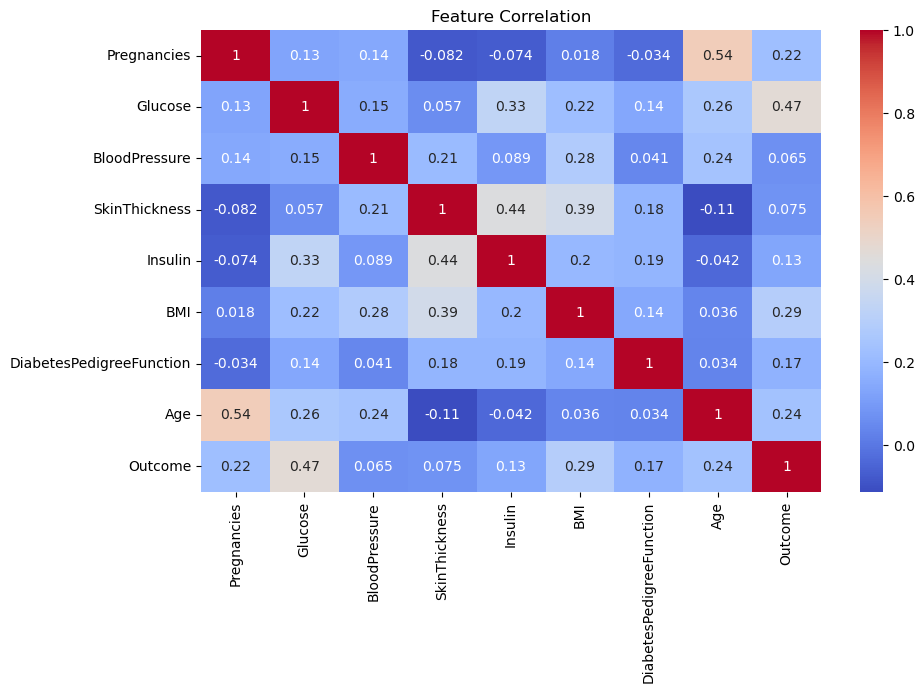

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [13]:
# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1 Score: 0.5599999999999999
ROC-AUC: 0.8229629629629629


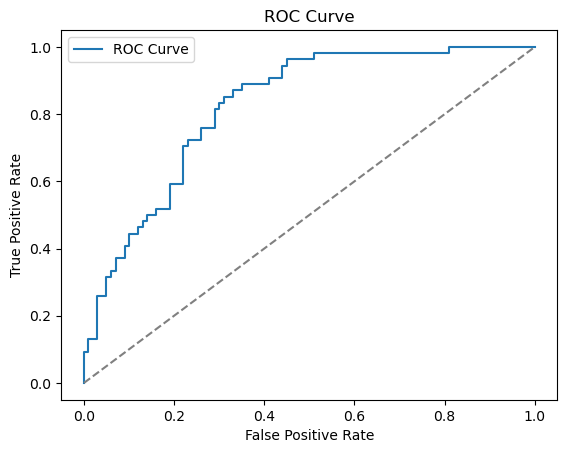

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [22]:
coefficients = pd.DataFrame({
    "Feature": df.drop("Outcome", axis=1).columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)


                    Feature  Coefficient
1                   Glucose     1.143826
5                       BMI     0.713810
0               Pregnancies     0.372997
6  DiabetesPedigreeFunction     0.255507
7                       Age     0.184135
3             SkinThickness     0.066424
4                   Insulin    -0.127291
2             BloodPressure    -0.197716


In [25]:
# Save trained model
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [26]:
# Load trained model and scaler
model = pickle.load(open("diabetes_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))


In [27]:
st.title("🩺 Diabetes Prediction App (Logistic Regression)")


2025-09-05 09:27:48.529 
  command:

    streamlit run C:\Users\Shreyas Bagave\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [28]:
# User inputs
preg = st.number_input("Pregnancies", 0, 20, 1)
glucose = st.number_input("Glucose", 0, 200, 100)
bp = st.number_input("Blood Pressure", 0, 150, 70)
skin = st.number_input("Skin Thickness", 0, 100, 20)
insulin = st.number_input("Insulin", 0, 900, 80)
bmi = st.number_input("BMI", 0.0, 70.0, 25.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0, 3.0, 0.5)
age = st.number_input("Age", 0, 120, 30)


In [29]:
# Prepare features
features = np.array([[preg, glucose, bp, skin, insulin, bmi, dpf, age]])
features_scaled = scaler.transform(features)


C:\Users\Shreyas Bagave\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
# Prediction
if st.button("Predict"):
    pred = model.predict(features_scaled)[0]
    prob = model.predict_proba(features_scaled)[0][1]
    if pred == 1:
        st.error(f" High risk of Diabetes (Probability: {prob:.2f})")
    else:
        st.success(f"Low risk of Diabetes (Probability: {prob:.2f})")
